In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import pickle

import warnings
warnings.filterwarnings("ignore")

#### Upload Data from Seaborn

In [2]:
penguins = sns.load_dataset("penguins")

#### EDA

In [3]:
#Explotary Data Analysis
print(penguins.head(),'\n')
print(penguins.info(),'\n')
print(penguins.describe(),'\n')
print(penguins.dtypes,'\n')
print(penguins.isna().sum())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flippe

In [4]:
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


#### Visualization

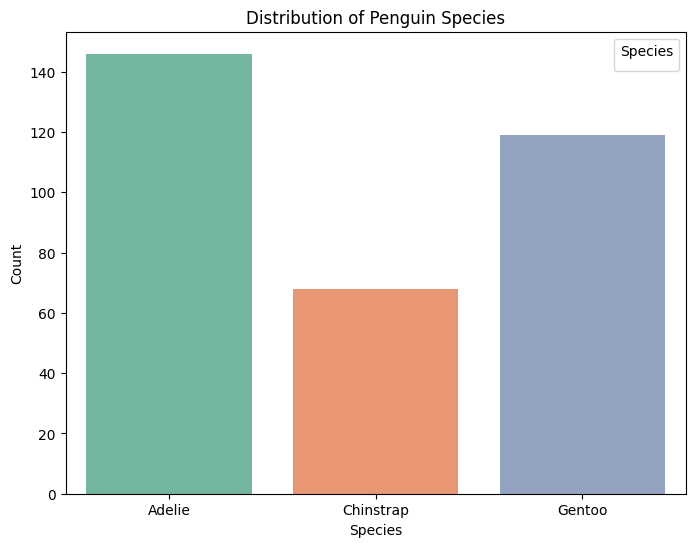

In [10]:
#Visualizations
#Histogram of the target variable
plt.figure(figsize=(8,6))
ax = sns.countplot(data=penguins,
                   x="species",
                   hue="species",      # same variable, to get legend
                   dodge=False,
                   palette="Set2")
plt.title("Distribution of Penguin Species")
plt.xlabel("Species")
plt.ylabel("Count")
ax.legend(title="Species") 
plt.show()

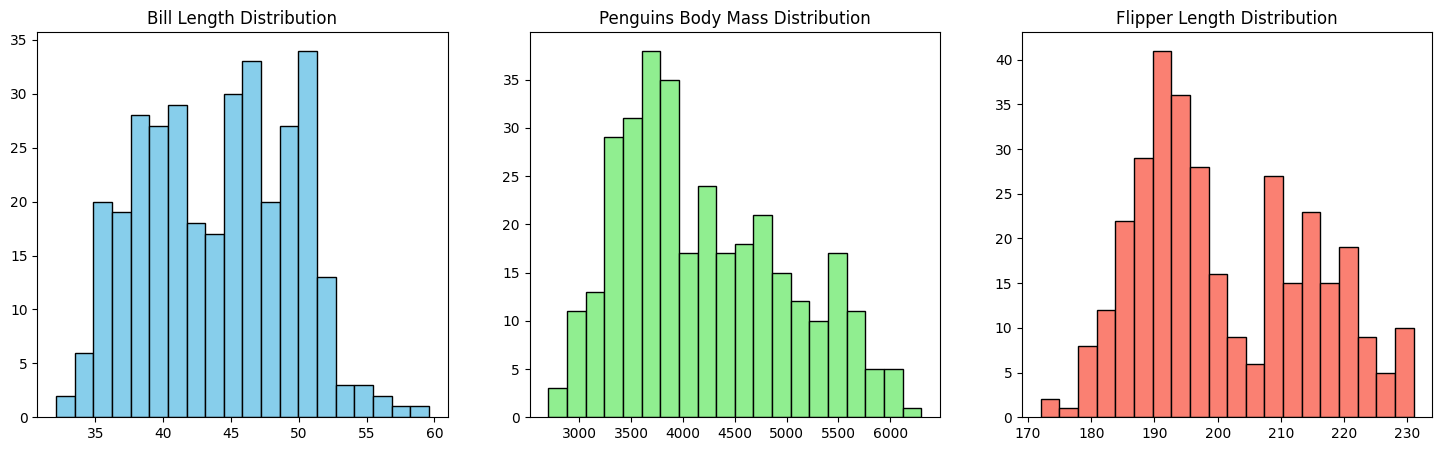

In [6]:
#Histograms of 2-3 key features
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].hist(penguins['bill_length_mm'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Bill Length Distribution')

ax[1].hist(penguins['body_mass_g'], bins=20, color='lightgreen', edgecolor='black')
ax[1].set_title('Penguins Body Mass Distribution')

ax[2].hist(penguins['flipper_length_mm'], bins=20, color='salmon', edgecolor='black')
ax[2].set_title('Flipper Length Distribution')

plt.show()

In [11]:
X = penguins.drop('species', axis=1)
y = penguins['species']

cat_cols = ['island', 'sex']
num_cols = [c for c in X.columns if c not in cat_cols]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
model = RandomForestClassifier(random_state=42)

clf = Pipeline(steps=[('preprocess', preprocess),
                     ('model', model)])

clf.fit(X_train, y_train)



,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [14]:
y_train_pred = clf.predict(X_train)
y_test_pred  = clf.predict(X_test)

print("Train classification report:")
print(classification_report(y_train, y_train_pred))

print("Test classification report:")
print(classification_report(y_test, y_test_pred))

# Predicted probabilities for each class
y_train_proba = clf.predict_proba(X_train)
y_test_proba  = clf.predict_proba(X_test)

Train classification report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Test classification report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [15]:
train_roc_auc = roc_auc_score(
    y_train, y_train_proba,
    multi_class='ovr',
    average='macro'
)

test_roc_auc = roc_auc_score(
    y_test, y_test_proba,
    multi_class='ovr',
    average='macro'
)

print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC :", test_roc_auc)

Train ROC-AUC: 1.0
Test ROC-AUC : 1.0


In [16]:
filename = 'penguin_classifier_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(clf,file)
    
print("Model saved to", filename)

Model saved to penguin_classifier_model.pkl
